In [24]:
while True:
    A,B = map(int, input().split())
    if 0<A<10 and 0<B<10:
        print(A+B)
    else:
        break

0 0


### 합성곱 연산 과정 
1. 합성곱 신경망에서는 하나의 함수가 다른 함수와 얼마나 일치하는가 
2. 합성곱 연산은 하나의 필터(Kernel)에 대해 이미지를 쭉 지나가면서 이미지의 부분 부분이 필터와 얼마나 일치하는지 계산 
3. 이미지의 빨간 박스 부분과 필터 간 요소들을 각각 1대 1 대응으로 곱해서 총합을 구해 9로 나눠서 평균 
4. 필터(Kernel)의 크기는 자유자재로 정할 수 있음 
5. Stride(스트라이드) : 필터가 이동하는 단위 
6. Activation Map or Feature Map : 필터 하나당 입력 이미지 전체에 대한 필터의 일치 정도 
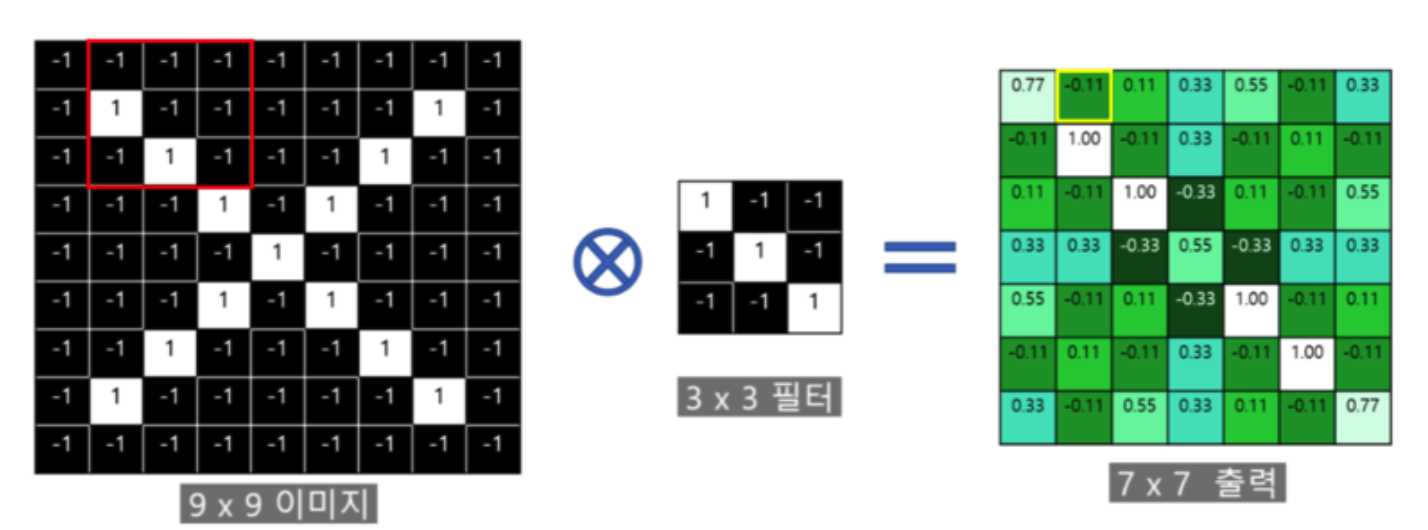

### Padding and Pooling 
1. Padding : 합성곱 연산을 사용하되 더 깊은 신경망을 만들기 위한 방법 
    - 일정한 크기의 층으로 이미지를 감싸는 것 
    - ex) 9*9이미지가 패딩을 하게 되면 11*11의 이미지로 변환 
    - 패딩을 1 준 상태에서 3*3 필터를 적용하면 원래 9*9에서 7*7로 줄어드는 이미지가 11*11에서 9*9로 줄어들기 때문에 원본의 크기를 그대로 유지 가능 
    - 패딩을 사용하는 이유는 입력 이미지에서 충분한 특성을 뽑기 위해 
2. Polling : Downsampling 또는 Subsampling의 일종 
    - Max Pooling : 일정 크기의 구간 내에서 가장 큰 값만을 전달하고 다른 정보는 버리는 방법
        - 일정 구간에서 해당 필터의 모양과 비슷한 부분을 전달하는 연산 
    - Average Pooling : 일정 크기의 구간 내의 값들의 평균을 전달하는 방법 
        - 해당 필터의 모양과 평균적으로 얼마나 일치하는지를 뽑아내는 연산
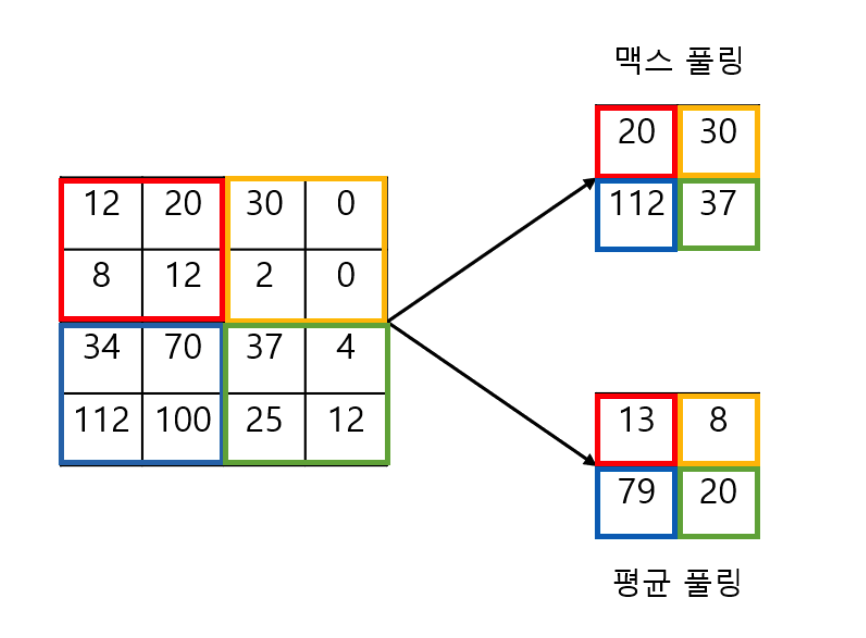

### Softmax Function 
1. 신경망의 출력을 확률로 바꿔주기 위해서 사용하는 함수 
2. 확률값으로 나오고 값을 전부 더했을때 1이 나옴 
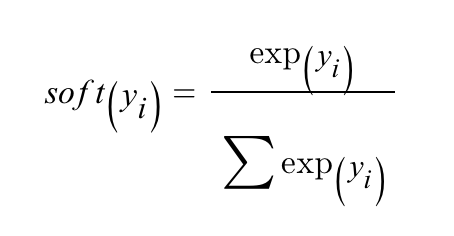
### Cross Entorpy Function 
1. 클래스를 구분하는 박업에서는 주로 교차 엔트로피 손실함수를 사용 
    - 엔트로피 : 일어날 확률이 작을수록 가지고 있는 정보가 크고 일어날 확률이 클수록 가지고 있는 정보가 작은 것 
    - 엔트로피는 불확실성의 척도? 
2. 교차 엔트로피의 목표는 최적의 확률분포 p와 이를 근사하려는 확률분포 q가 얼마나 다른지를 측정하는 방법 
    - 원래 p였던 분포를 q로 표현했을 때 얼마만큼의 비용이 드는지를 측정함 
### 엔트로피와 교차 엔트로피 잘모르겠음 

### Hyper Parameter

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

batch_size = 256 
learning_rate = 0.0002
num_epoch = 10

# DataLoader 모듈 : 배치 사이즈대로 묶어서 전달하거나 더 효율적인 학습을 위해 데이터를 어떤 규칙에 따라 정렬하거나 섞거나 하는 역할을 해줌 
# torchvision : 유명한 영상처리용 데이터 셋, 모델, 이미지 변환기가 들어있는 패키지 
# torchvision.datasets : 데이터를 읽어오는 역할 
# torchvision.transforms : 불러온 이미지를 필요에 따라 변환해주는 역할 

In [29]:
mnist_train = dset.MNIST('./', train = True, transform = transforms.ToTensor(),
                         target_transform = None, download = True)

mnist_test = dset.MNIST('./', train = False, transform = transforms.ToTensor(),
                         target_transform = None, download = True)
# datasets 모듈을 통해 Mnist 데이터를 불러오며 transforms를 통해 텐서로 변환해줌 
# train에 True를 넣으면 학습 데이터를 불러옴 
# transform과 target_transform은 데이터와 라벨에 대한 변형을 의미 
# transform.ToTensor : 이미지 데이터를 파이토치 텐서로 변환하는 것 
# download : 현재 경로에 Mnist 데이터가 없으면 다운로드 여부 


train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size,
                                           shuffle = True, num_workers = 2, drop_last = True)

test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size,
                                          shuffle = False, num_workers = 2, drop_last = True)
# num_workers : 데이터를 묶을 때 사용할 프로세스 개수 즉, batch_size만큼 데이터를 묶을 때 사용하는 것 
# drop_last : 묶고 남는 데이터는 버릴지 여부 설정 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...


/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370126481/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


### Create Model

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # super 클래스는 CNN클래스의 부모 클래스인 nn.Module을 초기화하는 역할 
        
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,5),
            # Conv2 : in_channels, out_channels, kernel_size, stride, padding이라는 인자가 존재 
            # in_channels가 1이고 out_channels가 16이며 kernel_size가 5로 넣었음 
            # [batch_size, 1, 28, 28]인 입력값이 nn.Conv2d를 통과하면 [batch_size, 16, 24,24]가 된다.
            nn.ReLU(),
            # ReLu연산을 통과하면 [batch_size, 32, 20, 20]이 된다.
            nn.Conv2d(16,32,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # MaxPool2d : kernel_size, stride, padding이라는 인자가 존재 
            # kernel_size : 풀링 연산을 할 때 한번에 훑는 영역의 크기 
            # stride kernel이 움직이는 크기 
            # 2*2영역에서 풀링하고 2만큼 움직이면 [batch_size, 32, 10, 10]크기가 됨 
            nn.Conv2d(32,64,5),
            # [batch_size, 64, 6, 6]
            nn.ReLU(),
            nn.MaxPool2d(2,2)
            # [batch_size, 64, 3, 3]
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 3 * 3, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        # 모든 프로세스를 거치게 되면 [batch_size, 10]인 형태의 텐서가 나옴 
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        # view함수는 텐서의 모양을 바꾸는 것 reshape느낌?
        # view함수에서 -1은 -1은 알아서 계산하라는 의미 
        # [bath_size, 64, 3, 3]형태의 텐서를 view함수를 통해 바꿔줌 
        out = self.fc_layer(out)
        return out

In [43]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# cpu로 실행하기 위해 지정 
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### Train

In [47]:
loss_arr = []
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)
        
        optimizer.zero_grad()
        # backpropagation을 하기 전 항상 기울기를 0으로 만들어 주는 것 즉 초기화 해준다고 생각
        output = model.forward(x)
        loss = loss_func(output, y_)
        # 모델의 추정값과 실제값을 비교 
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(6.3787e-05, grad_fn=<NllLossBackward>)
tensor(6.6520e-05, grad_fn=<NllLossBackward>)
tensor(0.0001, grad_fn=<NllLossBackward>)
tensor(4.7498e-05, grad_fn=<NllLossBackward>)
tensor(3.3266e-05, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)
tensor(1.0682e-05, grad_fn=<NllLossBackward>)
tensor(2.5892e-05, grad_fn=<NllLossBackward>)


### Valid

In [50]:
correct = 0
total = 0

with torch.no_grad():
    for image, label in test_loader:
        x = image.to(device)
        y_ = label.to(device)
        
        output = model.forward(x)
        _,output_index = torch.max(output, 1)
        
        total+= label.size(0)
        correct += (output_index == y_).sum().float()
        
    print('Accuracy of Test Data : {}'.format(100*correct/total))

Accuracy of Test Data : 99.18870544433594
